In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
customer_data = pd.read_csv("Mall_Customers.csv")

In [4]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.shape

(200, 5)

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
X = customer_data.iloc[:,[3,4]].values

In [9]:
wcss=[]
for i in range(1,15):
    k_means1= KMeans(n_clusters=i,init="k-means++",random_state=54)
    k_means1.fit(X)
    wcss.append(k_means1.inertia_)

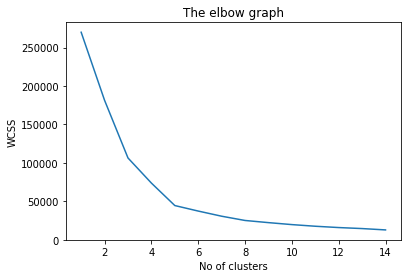

In [10]:
plt.plot(range(1,15),wcss)
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.title("The elbow graph")
plt.show()

In [15]:
Trainig_kmeans= KMeans(n_clusters=5,init="k-means++",random_state=5)
Y=Trainig_kmeans.fit_predict(X)


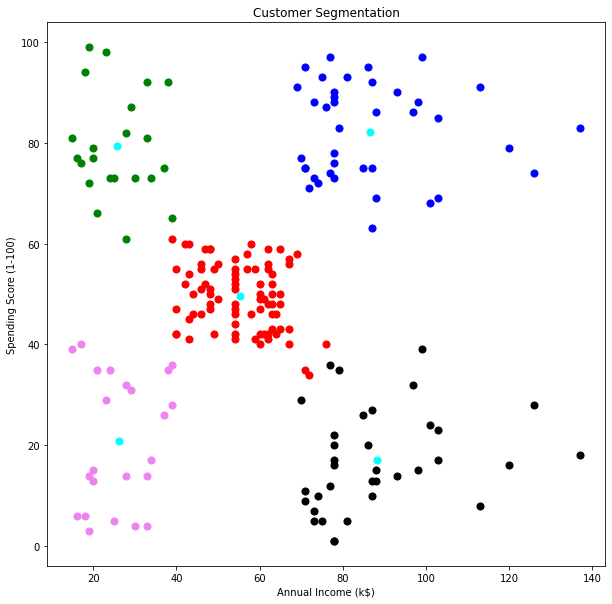

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c="green",label="Cluster1")
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c="red",label="Cluster2")
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c="blue",label="Cluster3")
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c="violet",label="Cluster4")
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c="black",label="Cluster5")
plt.scatter(Trainig_kmeans.cluster_centers_[:,0],Trainig_kmeans.cluster_centers_[:,1],s=50,c="cyan",label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation")
plt.show()